In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:

y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:

y_test = y_test.reshape(-1,)

In [ ]:

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

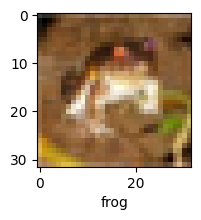

In [ ]:

plot_sample(X_train, y_train, 0)

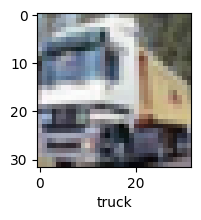

In [ ]:

plot_sample(X_train, y_train, 1)

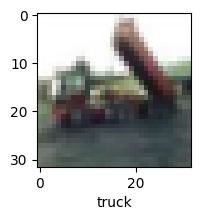

In [ ]:
plot_sample(X_train, y_train, 2)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 40ms/step - accuracy: 0.3786 - loss: 1.6973
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.5963 - loss: 1.1488
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.6515 - loss: 0.9955
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.6836 - loss: 0.9074
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.7090 - loss: 0.8349
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.7325 - loss: 0.7703
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.7518 - loss: 0.7218
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7687 - loss: 0.6665
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 42ms/step - accuracy: 0.7805 - loss: 0.6348
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.7912 - loss: 0.5983


In [ ]:

cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6938 - loss: 0.9381


[0.940615713596344, 0.6897000074386597]

In [ ]:

y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


array([[1.4713408e-02, 5.2925450e-04, 1.5514864e-02, 8.3125055e-01,
        2.1673974e-03, 1.0509723e-01, 8.9661255e-03, 6.8163965e-04,
        1.5626673e-02, 5.4527689e-03],
       [1.2199184e-01, 2.5835800e-01, 3.5099805e-05, 3.5730784e-06,
        9.5409700e-07, 3.4290838e-07, 1.6633368e-08, 7.9161111e-07,
        6.1574656e-01, 3.8628224e-03],
       [7.3349543e-02, 4.2400125e-01, 1.3698947e-03, 4.3012537e-03,
        5.9846756e-03, 7.9529994e-04, 1.5616270e-04, 3.1412544e-03,
        3.9049745e-01, 9.6403219e-02],
       [9.2949945e-01, 4.1838404e-02, 6.1332425e-03, 2.2103173e-04,
        8.1722497e-04, 9.7267875e-06, 3.3401109e-05, 8.9606641e-05,
        2.0435739e-02, 9.2226645e-04],
       [1.1068035e-05, 3.1059491e-05, 4.2227716e-03, 8.4120415e-02,
        7.4918725e-02, 2.5977561e-02, 8.1035936e-01, 1.3143699e-04,
        4.9613049e-05, 1.7802122e-04]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(1), np.int64(0), np.int64(6)]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

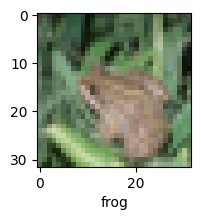

In [ ]:

plot_sample(X_test, y_test,4)

In [ ]:
classes[y_classes[4]]

'frog'